### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
path = r'C:\Users\nodnarb\Documents\Machine Learning'

In [4]:
# Importing weather station data

df = df = pd.read_csv(os.path.join(path, '01 Data Sets', 'weather.csv'))

In [5]:
# Importing pleasant weather data

pleasant = pd.read_csv(os.path.join(path, '01 Data Sets', 'pleasant_weather.csv'))

In [6]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [7]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Data wrangling and scaling

In [9]:
# Creating subset data for year 2000

df2000 = df[df['DATE'].astype(str).str.contains('2000')]
df2000

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,1,8,2.1,0.89,1.0286,0.20,0.03,0,0.0,...,6,0.89,1.0235,0.22,0.10,0,0.7,6.6,2.1,11.0
14611,20000102,1,8,2.1,0.87,1.0318,0.25,0.00,0,0.0,...,8,0.92,1.0177,0.13,0.42,0,0.0,9.6,7.3,10.6
14612,20000103,1,5,2.1,0.81,1.0314,0.50,0.00,0,3.7,...,4,0.79,1.0154,0.22,1.05,0,1.2,8.6,7.3,9.9
14613,20000104,1,7,2.1,0.79,1.0262,0.63,0.35,0,6.9,...,6,0.76,1.0099,0.36,0.34,0,3.5,8.1,5.0,7.7
14614,20000105,1,5,2.1,0.90,1.0246,0.51,0.07,0,3.7,...,7,0.81,0.9957,0.12,0.33,0,0.0,7.7,4.0,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,20001227,12,5,2.1,0.83,0.9921,0.37,0.04,0,1.7,...,4,0.84,0.9983,0.23,0.37,0,1.5,1.4,-2.9,5.1
14972,20001228,12,6,2.1,0.80,1.0002,0.17,0.01,0,1.1,...,6,0.85,0.9966,0.24,0.43,0,1.4,2.0,-2.6,6.5
14973,20001229,12,8,2.1,0.81,1.0021,0.16,0.17,0,0.0,...,2,0.87,1.0052,0.44,0.09,0,6.4,2.4,-0.9,5.7
14974,20001230,12,4,2.1,0.77,1.0069,0.43,0.01,1,3.3,...,5,0.85,1.0115,0.38,2.73,0,1.6,3.7,-2.6,4.5


In [10]:
# Scaling 2000 dataset

scaler = StandardScaler()

In [11]:
scaled2000 = pd.DataFrame(scaler.fit_transform(df2000))

In [12]:
# Display columns for creating dendrograms

columns = df.columns.values.tolist() 
columns

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [13]:
# Assign columns to scaled data

scaled2000.columns = columns
scaled2000.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.639546,-1.597591,1.122068,-4.440892e-16,1.727163,1.285994,-1.173221,-0.433233,-0.136209,-1.084565,...,0.020165,0.695379,0.898152,-1.082658,-0.574408,0.0,-0.783824,-1.118701,-1.451207,-0.610264
1,-1.636649,-1.597591,1.122068,-4.440892e-16,1.507249,1.662119,-1.120230,-0.503508,-0.136209,-1.084565,...,1.250210,1.061052,0.427782,-1.193093,-0.100709,0.0,-0.967839,-0.311596,-0.171110,-0.712815
2,-1.633753,-1.597591,-0.161297,-4.440892e-16,0.847508,1.615103,-0.855273,-0.503508,-0.136209,-0.265608,...,-1.209881,-0.523532,0.241256,-1.082658,0.831884,0.0,-0.652385,-0.580631,-0.171110,-0.892280
3,-1.630857,-1.597591,0.694280,-4.440892e-16,0.627595,1.003900,-0.717496,0.316365,-0.136209,0.442679,...,0.020165,-0.889205,-0.204784,-0.910870,-0.219134,0.0,-0.047764,-0.715148,-0.737307,-1.456311
4,-1.627961,-1.597591,-0.161297,-4.440892e-16,1.837119,0.815837,-0.844675,-0.339534,-0.136209,-0.265608,...,0.635187,-0.279750,-1.356379,-1.205364,-0.233937,0.0,-0.967839,-0.822763,-0.983480,-0.533350


### 3. Dendrograms

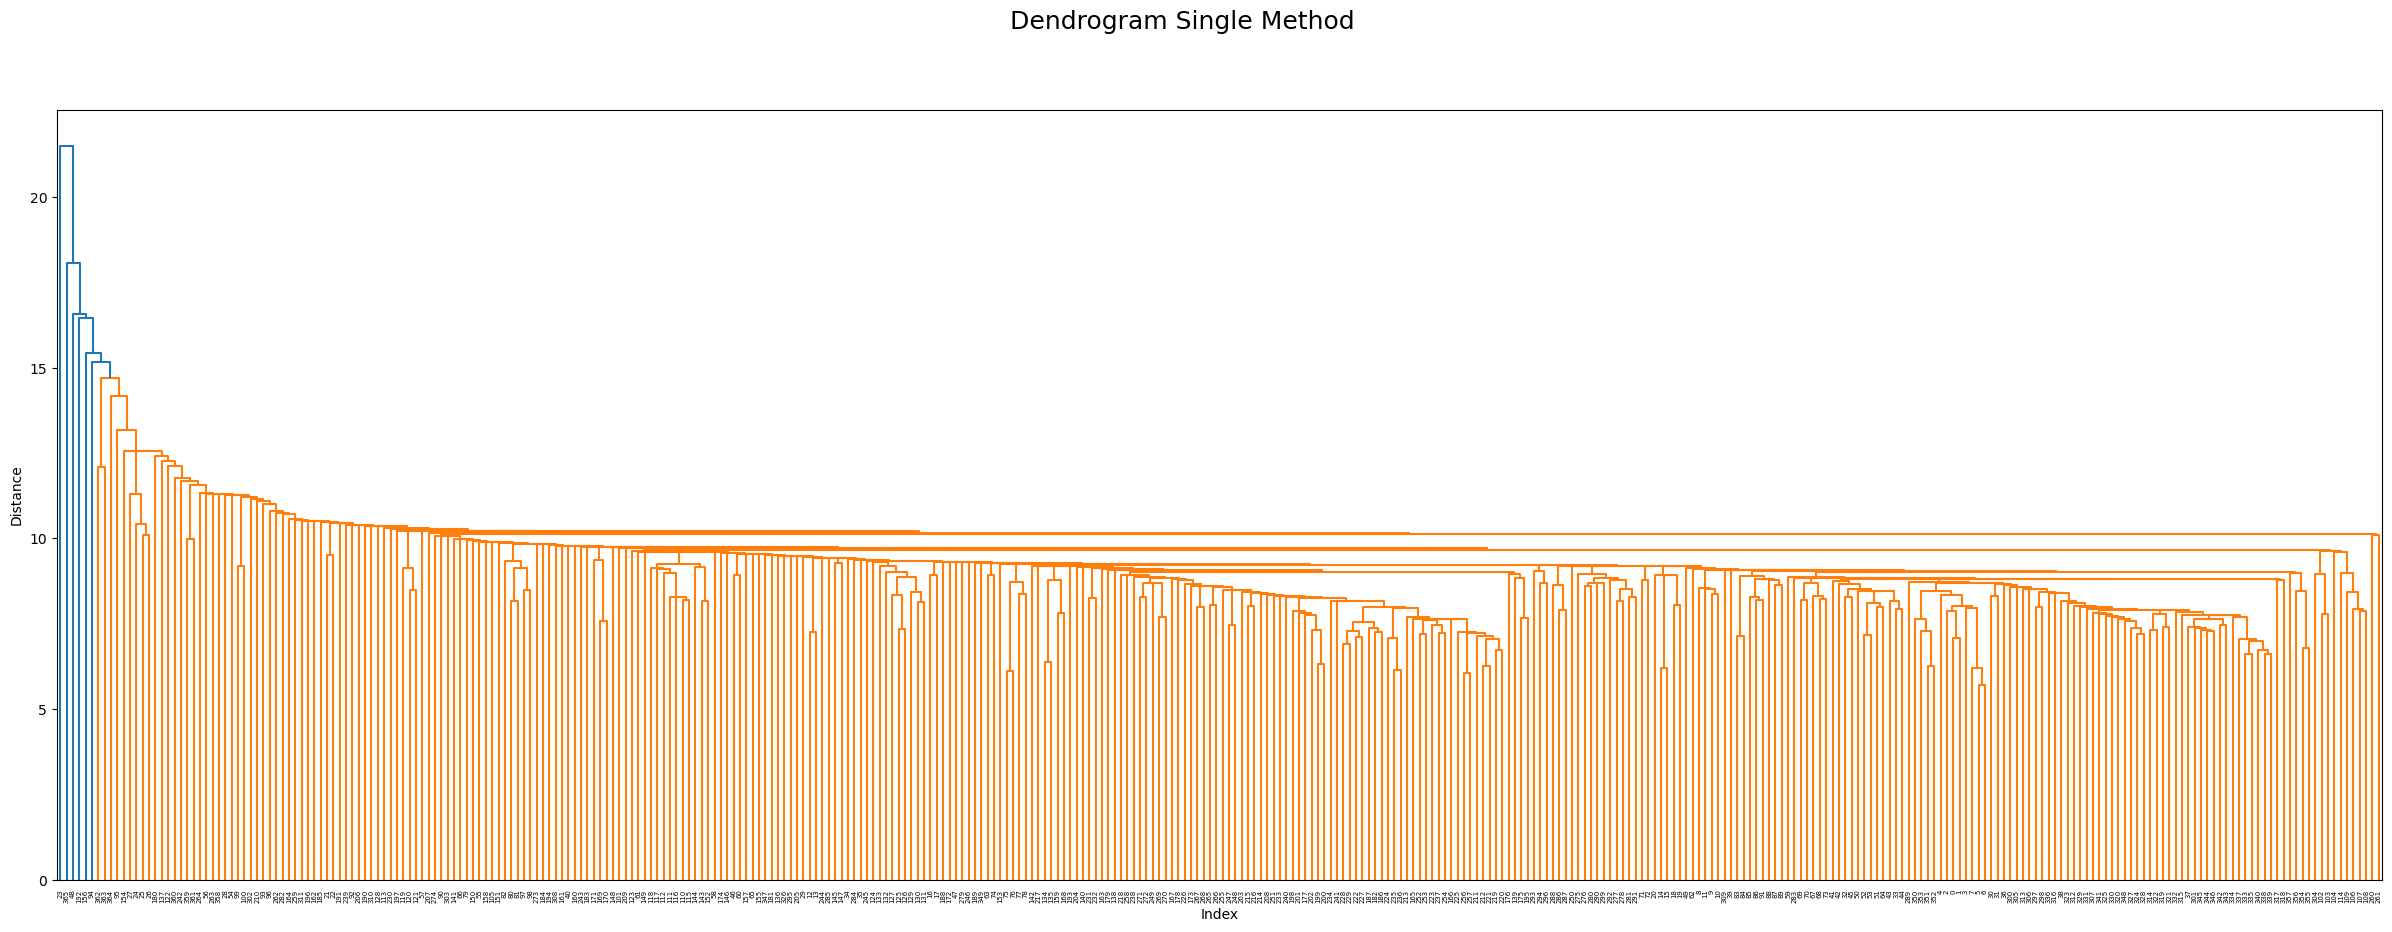

In [15]:
# All stations in 2000 single method

distance_single = linkage(scaled2000.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

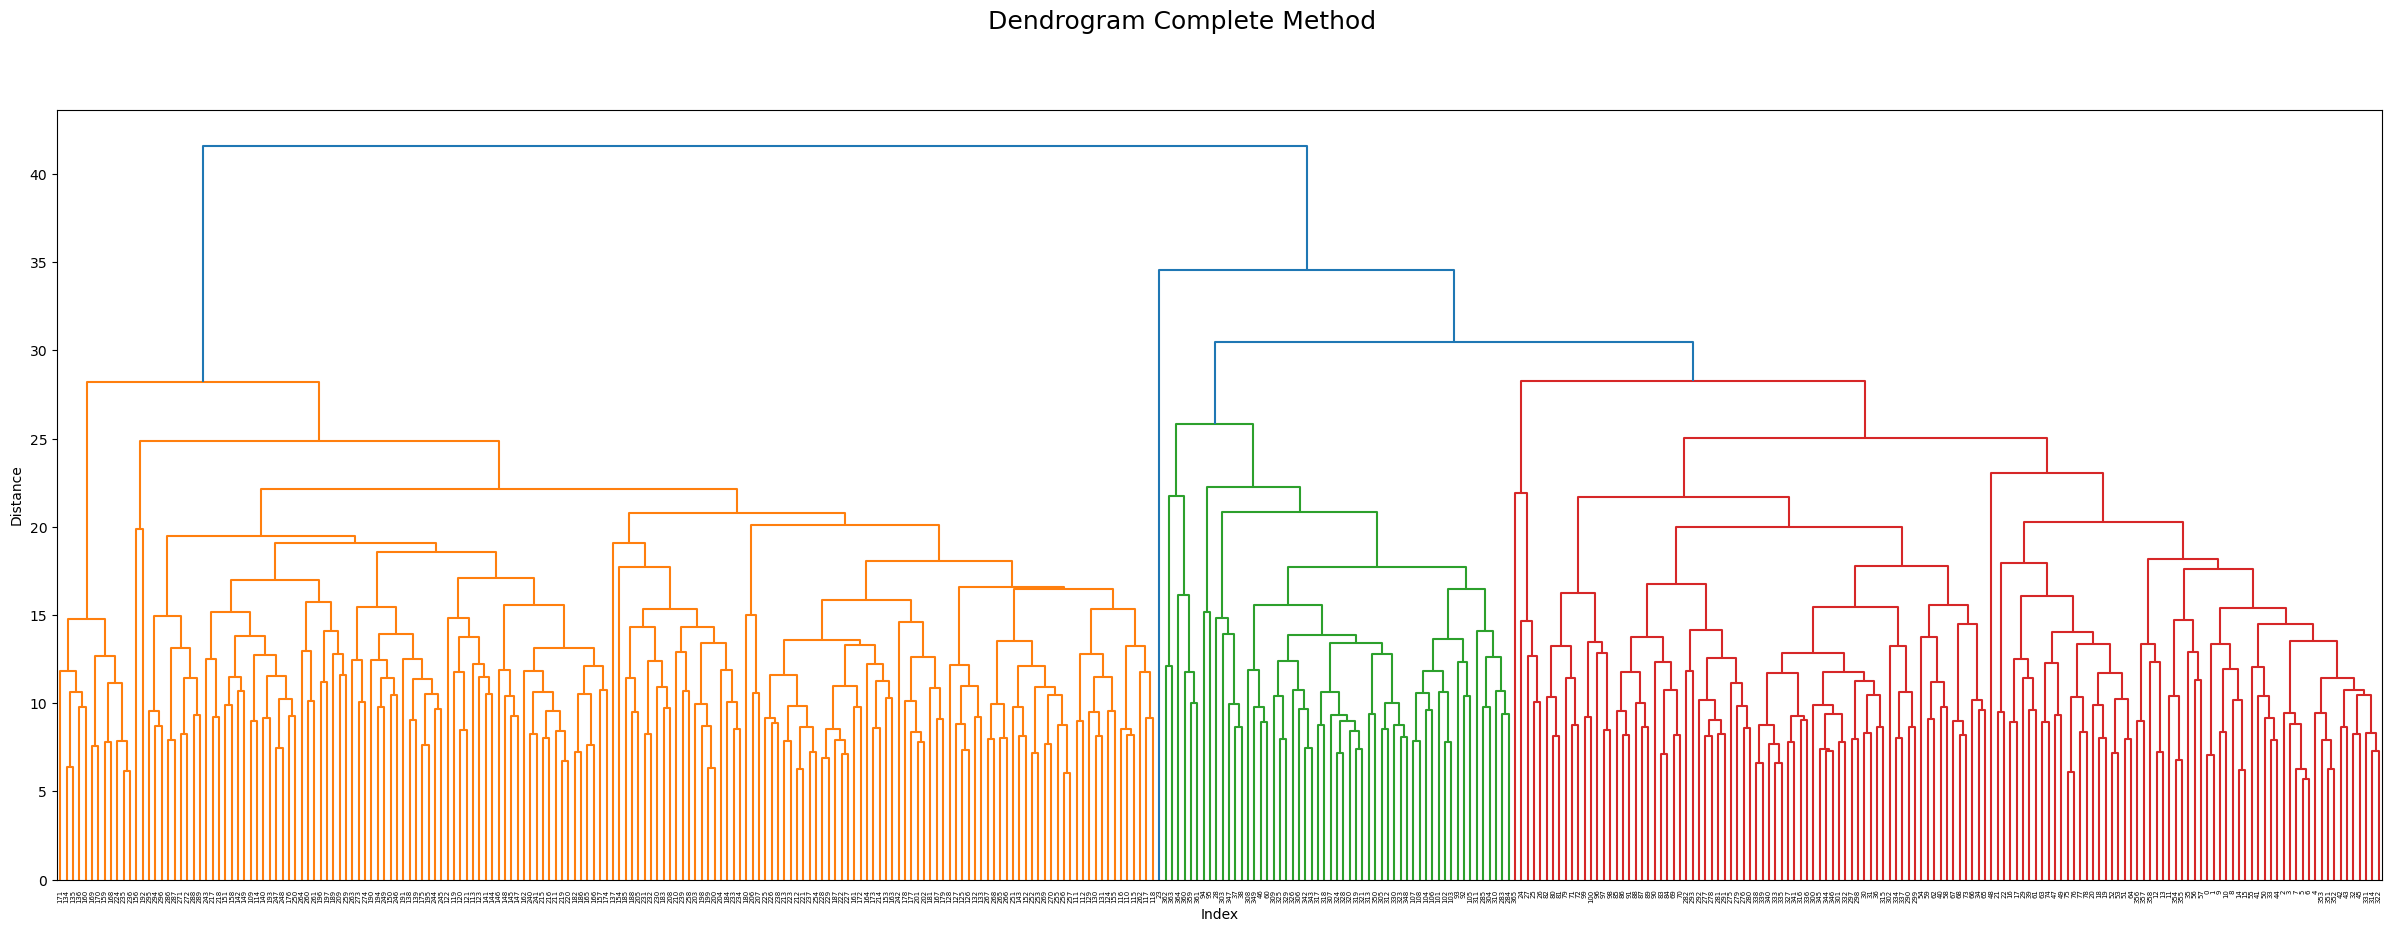

In [16]:
# All stations in 2000 complete method

distance_single = linkage(scaled2000.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

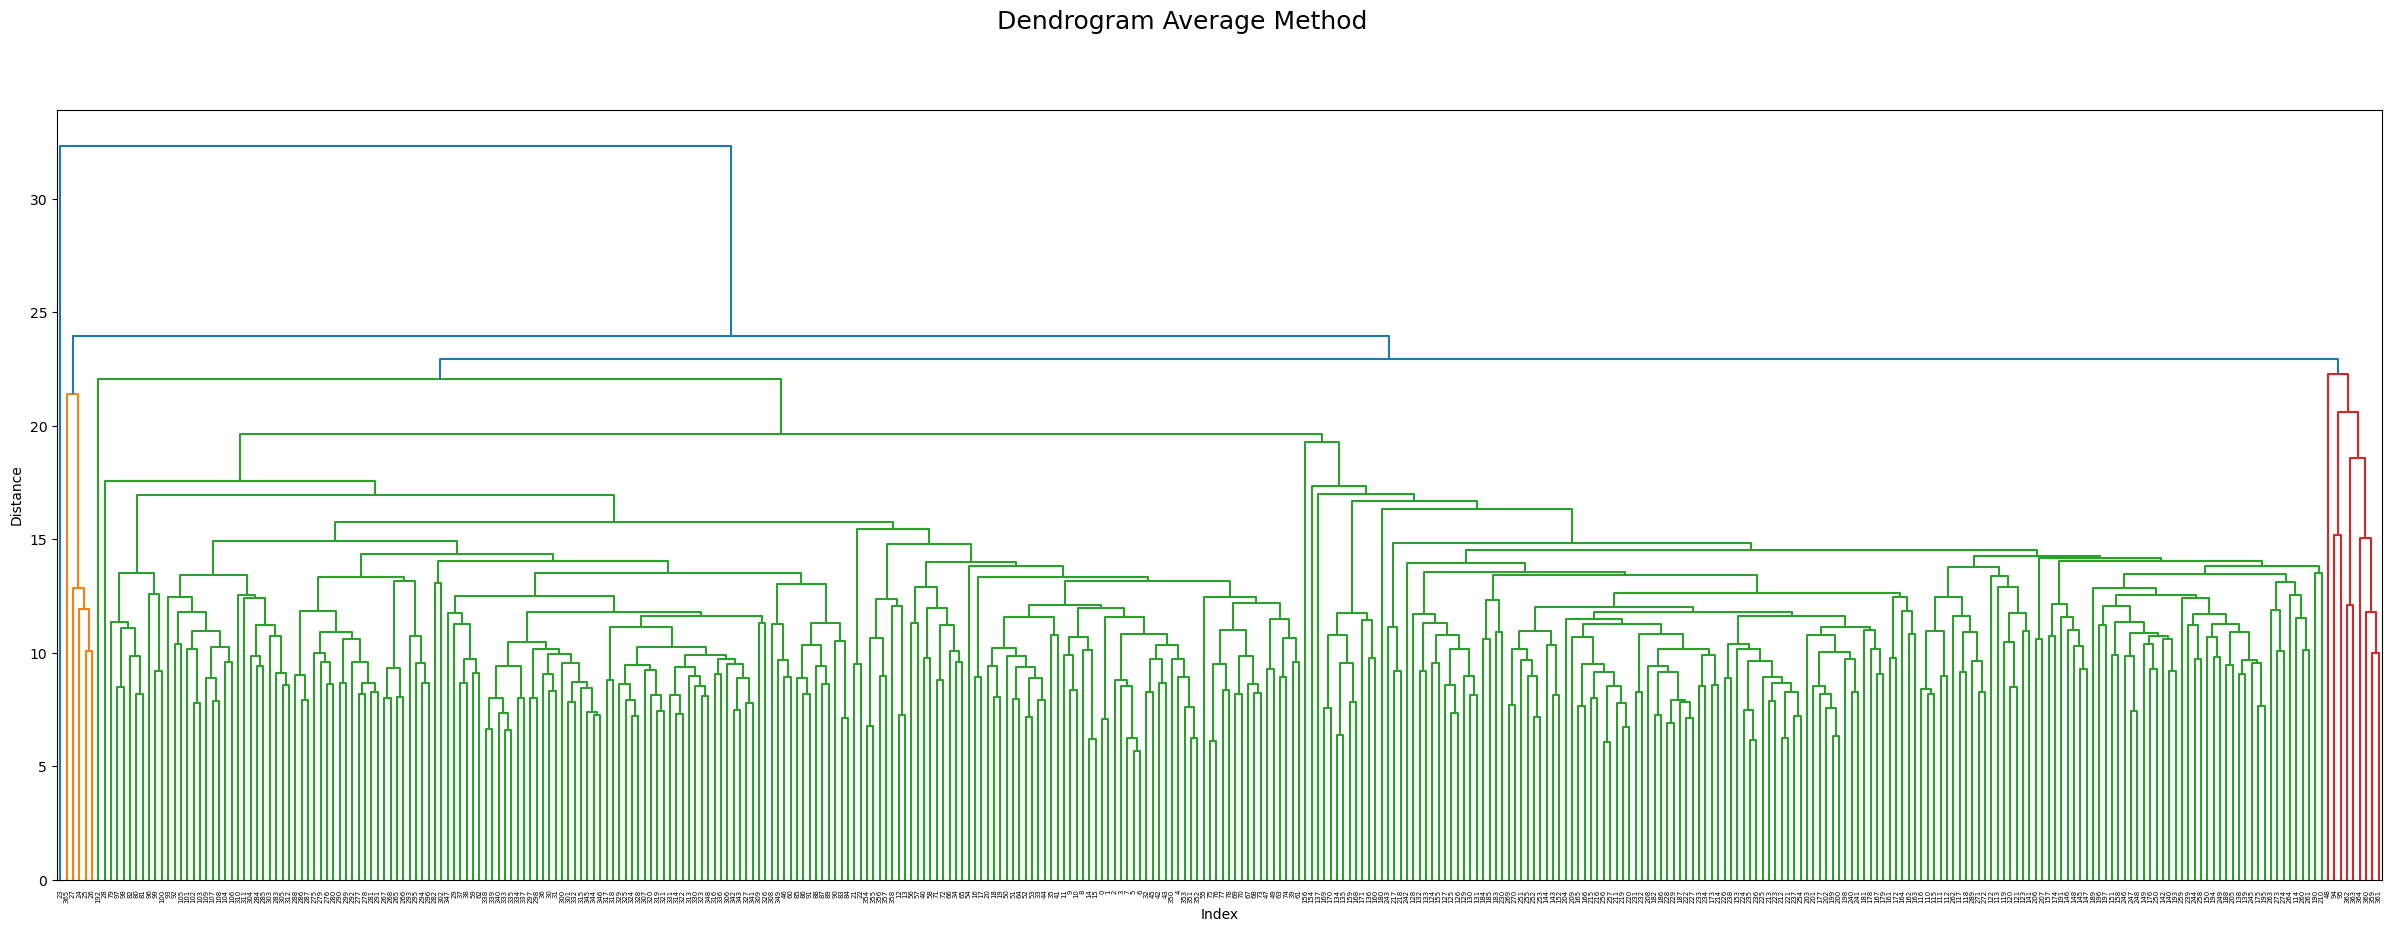

In [31]:
# All stations in 2000 average method

distance_single = linkage(scaled2000.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

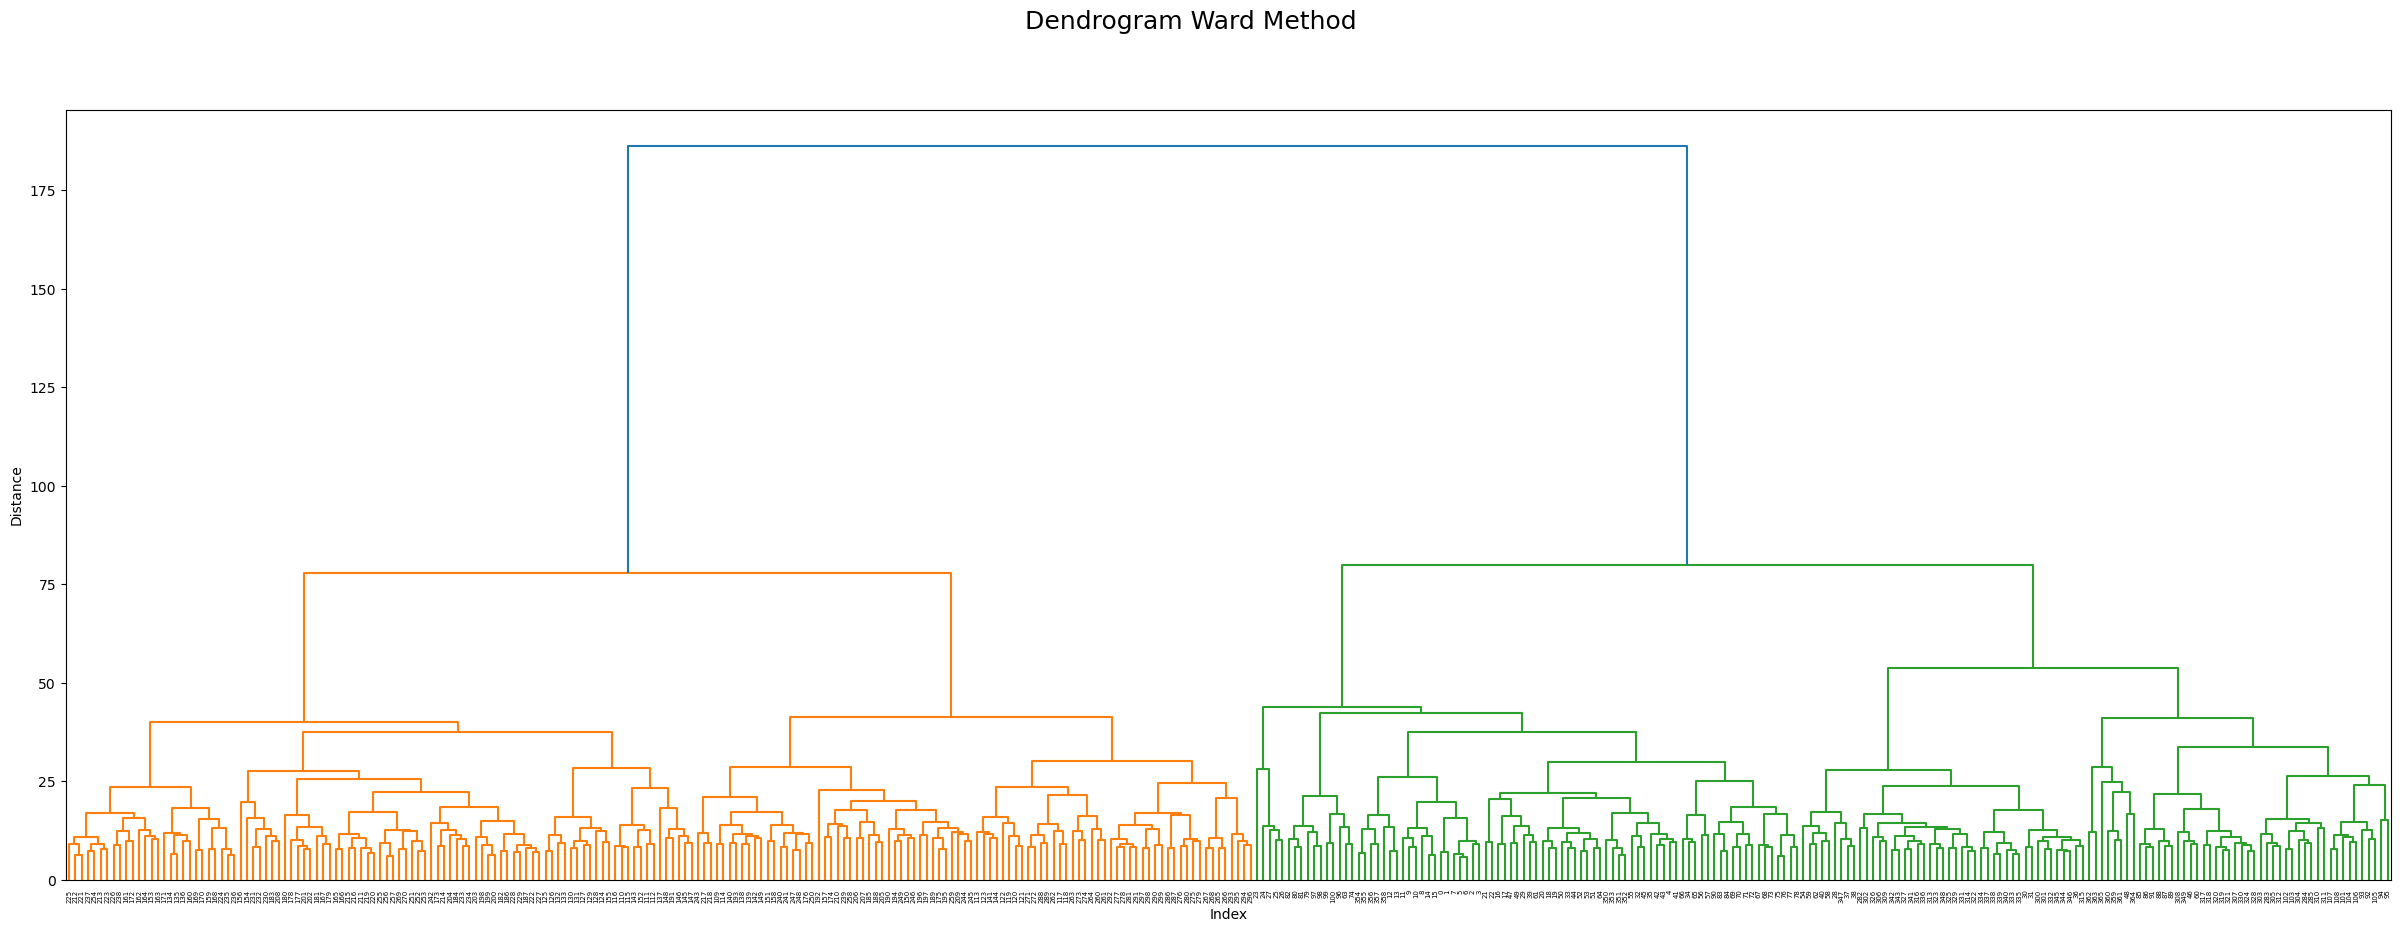

In [33]:
# All stations in 2000 ward method

distance_single = linkage(scaled2000.loc[:,
['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']],method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

### 4. Principal Component Analysis (PCA)

In [40]:
#Run the PCA model, reducing to 8 (for number of variables)

pca = PCA(n_components = 8)
principalComponents = pca.fit_transform(scaled2000)

In [42]:
principalComponents

array([[-12.36051499,   4.24255183,  -4.48626068, ...,   1.45511078,
          1.60512539,   1.88309531],
       [-11.33323185,   5.03386848,  -4.91454371, ...,   0.23295072,
          0.50217386,   0.20054455],
       [-10.85073823,   3.79697487,  -4.74037435, ...,  -0.59342076,
         -0.78686185,  -1.0591358 ],
       ...,
       [-13.12597327,  -6.93170654,   6.4857432 , ...,   0.15964553,
          2.55940265,  -1.48410836],
       [-13.13484345,  -3.68873039,   4.07960742, ...,   0.69766396,
          5.12046518,   0.16758792],
       [-13.26042986,   1.09641372,   2.83792567, ...,   2.19457394,
          4.19579109,   3.73454737]])

In [44]:
#Make a dataframe of the new components

dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8'])

In [46]:
dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-12.360515,4.242552,-4.486261,-2.067913,-0.055407,1.455111,1.605125,1.883095
1,-11.333232,5.033868,-4.914544,-0.630914,-0.655553,0.232951,0.502174,0.200545
2,-10.850738,3.796975,-4.740374,2.044608,1.462360,-0.593421,-0.786862,-1.059136
3,-9.799256,2.594733,-3.653368,1.370378,3.209725,1.402362,-1.140581,-2.896389
4,-10.416615,4.047152,-0.413172,2.759092,-2.115411,0.200558,-1.218405,0.185804
...,...,...,...,...,...,...,...,...
361,-11.801491,-8.482311,5.420473,-1.584048,-1.791965,3.888289,3.941734,-1.401399
362,-12.561587,-7.868330,6.404526,-1.023732,-2.422937,0.928955,4.275213,-1.116951
363,-13.125973,-6.931707,6.485743,-2.074425,-1.995315,0.159646,2.559403,-1.484108
364,-13.134843,-3.688730,4.079607,-3.214304,0.049123,0.697664,5.120465,0.167588


In [48]:
# Export PCA to new dataset

dfPCA.to_csv(os.path.join(path, '01 Data Sets', 'PCA2000.csv'))